Mounted at /content/drive


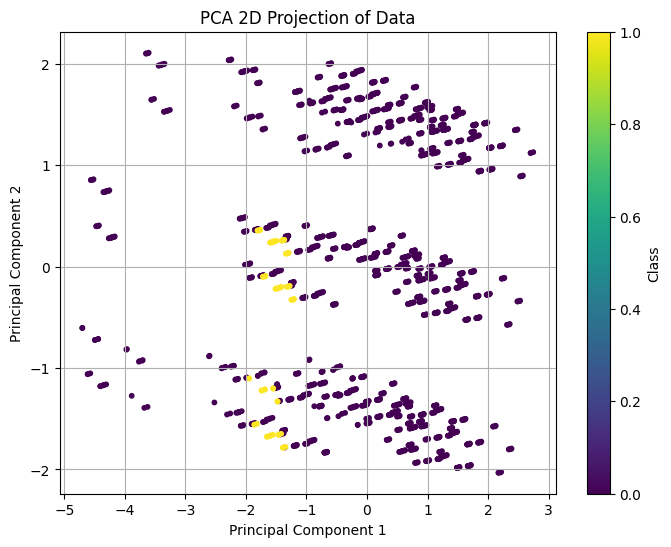

Random Forest Accuracy (Before PCA): 0.9827
Random Forest Accuracy (After PCA): 0.9884


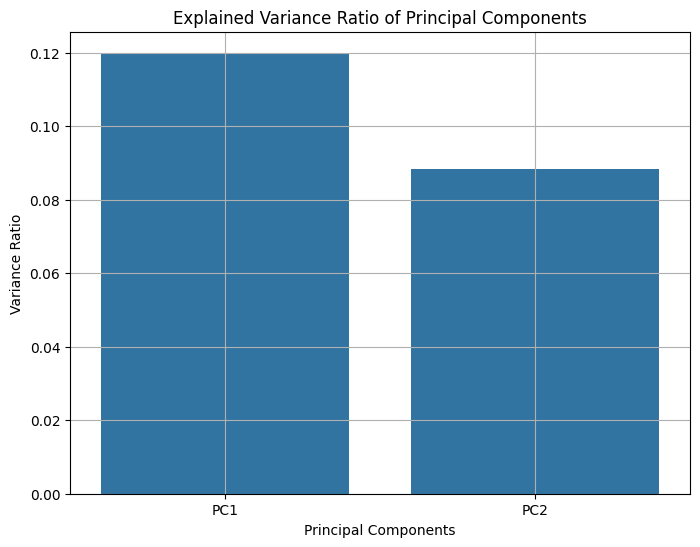

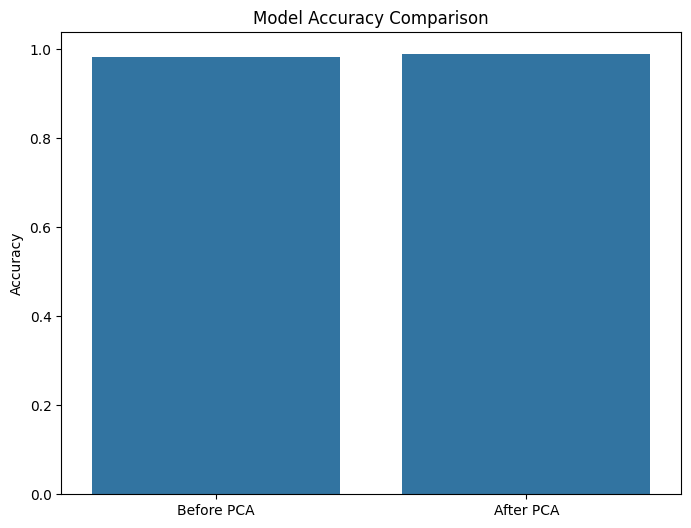

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/car_evaluation.csv"
data = pd.read_csv(file_path)

# 범주형 데이터를 숫자로 인코딩
data_encoded = pd.get_dummies(data, drop_first=True)

# 특성과 타깃 분리
X = data_encoded.drop('class', axis=1) if 'class' in data_encoded.columns else data_encoded.iloc[:, :-1]
y = data_encoded['class'] if 'class' in data_encoded.columns else data_encoded.iloc[:, -1]

# 데이터 정규화
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# PCA 적용 및 시각화
# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# 데이터 분포 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=10)
plt.colorbar(label='Class')
plt.title('PCA 2D Projection of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# PCA 적용 전후 랜덤포레스트 모델 성능 비교
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# PCA 적용 전 성능 평가
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_accuracy_before = accuracy_score(y_test, rf_model.predict(X_test))

# PCA 적용 후 성능 평가
rf_model_pca = RandomForestClassifier(random_state=42)
rf_model_pca.fit(X_pca_train, y_train)
rf_accuracy_after = accuracy_score(y_test, rf_model_pca.predict(X_pca_test))

print(f"Random Forest Accuracy (Before PCA): {rf_accuracy_before:.4f}")
print(f"Random Forest Accuracy (After PCA): {rf_accuracy_after:.4f}")

# 결과 시각화
# PCA 축소 결과 시각화
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance_ratio))], y=explained_variance_ratio)
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Components')
plt.grid()
plt.show()

# 모델 성능 비교 시각화
plt.figure(figsize=(8, 6))
models = ['Before PCA', 'After PCA']
accuracies = [rf_accuracy_before, rf_accuracy_after]
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
